IPython Notebooks
You can run a cell by pressing [shift] + [Enter] or by pressing the "play" button in the menu.
You can get help on a function or object by pressing [shift] + [tab] after the opening parenthesis

scikit-learn User Guide
http://scikit-learn.org/stable/user_guide.html
http://scikit-learn.org/stable/modules/classes.html

# Supervised Learning

In Supervised Learning, we have a dataset consisting of both input features and a desired output, such as is a cat or dog. The task is to construct a model (or program) which is able to predict the desired output of an unseen object given the set of input.

Supervised learning is further broken down into two categories, classification and regression. In classification, the label is discrete. In regression, the label is continuous.

In supervised learning, there is always a distinction between a training set for which the desired outcome is given, and a test set for which the desired outcome needs to be inferred.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Classification
========
First, we will look at a two class classification problem in two dimensions. We use the synthetic data generated by the ``make_blobs`` function.

In [2]:
from sklearn.datasets import make_blobs

#Generate isotropic Gaussian blobs for clustering. 
#cluster_std=1.0. 
#centers: the number of centers to generate, or the fixed center locations
#random_state is the seed used by the random number generator
X, y = make_blobs(centers=2, random_state=0)

print(X.shape)
print(y.shape)
print(X[:5, :])
print(y[:5])

(100, 2)
(100,)
[[ 4.21850347  2.23419161]
 [ 0.90779887  0.45984362]
 [-0.27652528  5.08127768]
 [ 0.08848433  2.32299086]
 [ 3.24329731  1.21460627]]
[1 1 0 0 1]


# As the data is two-dimensional, we can plot each sample as a point in two-dimensional space, with the first feature being the x-axis and the second feature being the y-axis.

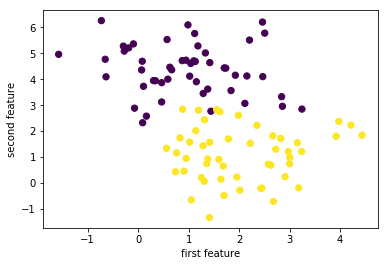

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
plt.xlabel("first feature")
plt.ylabel("second feature")

As classification is a supervised task, and we are interested in how well the model generalizes, we split our data into a training set,
to built the model from, and a test-set, to evaluate how well our model performs on new data. The ``train_test_split`` function form the ``cross_validation`` module does that for us, by randomly splitting of 25% of the data for testing.
<img src="figures/train_test_split.svg" width="100%">


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### The scikit-learn estimator API
<img src="figures/supervised_workflow.svg" width="100%">

Every algorithm is exposed in scikit-learn via an ''Estimator'' object. For instance a logistic regression is:

In [7]:
from sklearn.linear_model import LogisticRegression

# All models in scikit-learn have a very consistent interface.
First, we instantiate the estimator object.

In [8]:
classifier = LogisticRegression()

To built the model from our data, that is to learn how to classify new points, we call the ``fit`` function with the training data, and the corresponding training labels (the desired output for the training data point):

In [9]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
X_train.shape

(75, 2)

In [11]:
y_train.shape

(75,)

We can then apply the model to unseen data and use the model to predict the estimated outcome using the ``predict`` method:

In [12]:
prediction = classifier.predict(X_test)

We can compare these against the true labels:

We can evaluate our classifier quantitatively by measuring what fraction of predictions is correct. This is called **accuracy**:

In [13]:
print(prediction)
print(y_test)

[1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1]
[1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1]


In [14]:
np.mean(prediction == y_test)

0.92000000000000004

There is also a convenience function , ``score``, that all scikit-learn classifiers have to compute this directly from the test data:
    

In [15]:
classifier.score(X_test, y_test)

0.92000000000000004

It is often helpful to compare the generalization performance (on the test set) to the performance on the training set:

In [16]:
classifier.score(X_train, y_train)

0.92000000000000004

**Estimated parameters**: All the estimated parameters are attributes of the estimator object ending by an underscore. Here, these are the coefficients and the offset of the line:

In [17]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.02974678 -1.43697237]]
[ 2.09263249]


In [18]:
print(classifier.classes_)

[0 1]


k-nearest neighbors classification
============================

Another popular and easy to understand classifier is K nearest neighbors (kNN). It has one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

The interface is exactly the same as for LogisticRegression above.

In [19]:
from sklearn.neighbors import KNeighborsClassifier

This time we set a parameter of the KNeighborsClassifier to tell it we only want to look at one nearest neighbor:

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

We fit the model with our training data

In [21]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

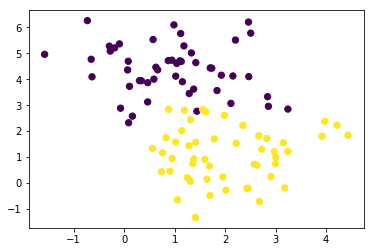

In [22]:
from figures import plot_2d_separator

plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

In [23]:
knn.score(X_test, y_test)

0.95999999999999996

Exercise 1 - KNeighborsClassifier
=========
Apply the KNeighborsClassifier to the ``iris`` dataset. Play with different values of the ``n_neighbors`` and observe how training and test score change.

Answers 1

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [29]:
# Create a k-NN classifier with 6 neighbors
classifier = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data X_train and y_train
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Now let us predict unlabled data

In [30]:
X_new = [ 5.5,3.5,1.4,0.2]
prediction =  classifier.predict([ [5.5,3.5,1.4,0.2]])
print(prediction)

[0]


In [31]:
classifier.score(X_train, y_train)

0.9642857142857143

In [32]:
classifier.score(X_test, y_test)

0.97368421052631582

Exercise 2 - Regression
==========
Fill in the missing code following the instructions below.

In regression we try to predict a continuous output variable. This can be most easily visualized in one dimension.
We will start with a very simple toy example. We will create a dataset out of a sinus curve with some noise:

In [52]:
x = np.linspace(-3, 3, 100)
print(x)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [53]:
rng = np.random.RandomState(42)
y = np.sin(4 * x) + x + rng.uniform(size=len(x))

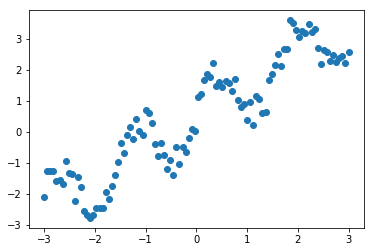

In [54]:
plt.plot(x, y, 'o')

Linear Regression
=================
One of the simplest models again is a linear one, that simply tries to predict the data as lying on a line. One way to find such a line is LinearRegression (also known as ordinary least squares).
The interface for LinearRegression is exactly the same as for the classifiers before, only that ``y`` now contains float values, instead of classes.

To apply a scikit-learn model, we need to make X be a 2d-array:

In [ ]:
print(x.shape)
X = x[:, np.newaxis]
print(X.shape)

We split our data in a training and a test set again:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(___, ____, random_state=42)

Then we can built our regression model :

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = ______

In [ ]:
regressor.fit(______, _______)

And predict. First let us try the training set:

In [ ]:
y_pred_train = regressor.predict(_______)

In [ ]:
plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

The line is able to capture the general slope of the data, but not many details.
Let's try the test set:

In [ ]:
y_pred_test = regressor.predict(_______)

In [ ]:
plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

In [ ]:
Evaluate the prediction quantitatively using the score method:

In [ ]:
regressor.score(______, ______)

KNeighborsRegression
=======================
As for classification, we can also use a neighbor based method for regression. We can simply take the output of the nearest point, or we could average several nearest points. This method is less popular for regression than for classification, but still a good baseline.

In [15]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

Again, let us look at the behavior on training and test set:

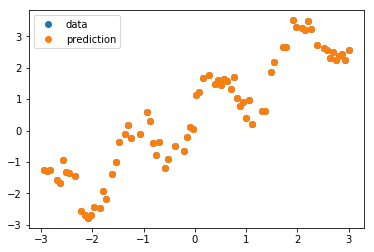

In [16]:
y_pred_train = kneighbor_regression.predict(______)

plt.plot(X_train, y_train, 'o', label="data")
plt.plot(X_train, y_pred_train, 'o', label="prediction")
plt.legend(loc='best')

On the training set, we do a perfect job: each point is its own nearest neighbor!

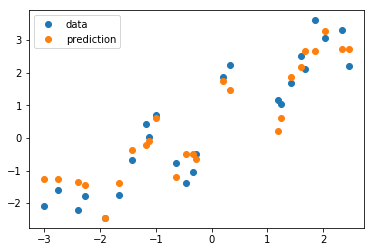

In [17]:
y_pred_test = kneighbor_regression.predict(______)

plt.plot(X_test, y_test, 'o', label="data")
plt.plot(X_test, y_pred_test, 'o', label="prediction")
plt.legend(loc='best')

On the test set, we also do a better job of capturing the variation, but our estimates look much more messy then before.
Let us look at the R2 score:

In [18]:
kneighbor_regression.score(_______, _______)

0.91662930224679484

Much better then before! Here, the linear model was not a good fit for our problem.